## What are Embeddings?

Think of embeddings as a way to translate words into a language that computers understand - numbers!

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Simplified 2D example (real embeddings have hundreds of dimenstions)

word_embeddings = {
    "cat": [0.8, 0.6],
    "kitten": [0.75, 0.65],
    "dog": [0.7, 0.3],
    "puppy": [0.65, 0.35],
    "car": [-0.5, 0.2],
    "truck": [-0.45, 0.15]
}

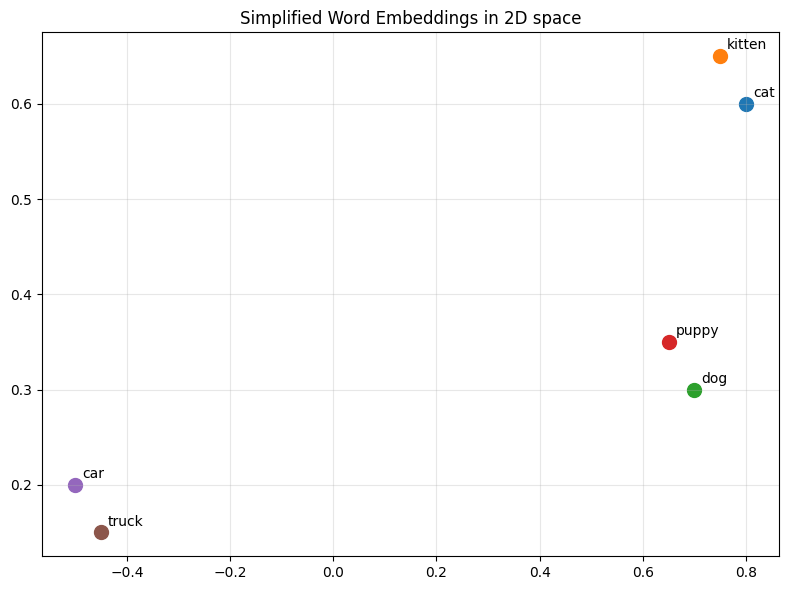

In [3]:
fig, ax = plt.subplots(figsize=(8,6))

for word, coords in word_embeddings.items():
    ax.scatter(coords[0], coords[1], s=100)
    ax.annotate(word, (coords[0], coords[1]), xytext=(5,5),
                textcoords='offset points'
    )

ax.set_label('Dimension 1')
ax.set_label('Dimension 2')

ax.set_title('Simplified Word Embeddings in 2D space')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [5]:
## Measuring Similarity

def cosine_similarity(vec1, vec2):
    """
    Cosine similarity measures the angle between two vectors.
    - Result close to 1: Very similar
    - Result close to 0: Not Related
    - Result close to -1: Opposite meanings
    """

    dot_product = np.dot(vec1, vec2)
    norm_a = np.linalg.norm(vec1) # Magnitude of Vector 1
    norm_b = np.linalg.norm(vec2) # Magnitude of Vector 2

    return dot_product/(norm_a * norm_b)

In [6]:
# Example
cat_vector = [0.8, 0.6, 0.3]
kitten_vector = [0.75, 0.65, 0.35]
car_vector = [-0.5, 0.2, 0.1]

cat_kitten_similarity = cosine_similarity(cat_vector, kitten_vector)
cat_car_similarity = cosine_similarity(cat_vector, car_vector)

print(f"Cat Kitten Similarity ${cat_kitten_similarity}")
print(f"Cat Car Similarity ${cat_car_similarity}")


Cat Kitten Similarity $0.9966186334192181
Cat Car Similarity $-0.43718588548916804


## Creating Your First Embeddings

In [7]:
### Huggingface And OpenAI Models

from langchain_huggingface import HuggingFaceEmbeddings

## Initialize simple Embedding Model(no API Key needed)
embeddings = HuggingFaceEmbeddings(
    model_name="sentence-transformers/all-MiniLM-L6-v2"
)

embeddings

/Users/satishkumark/Documents/RAG/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


HuggingFaceEmbeddings(model_name='sentence-transformers/all-MiniLM-L6-v2', cache_folder=None, model_kwargs={}, encode_kwargs={}, query_encode_kwargs={}, multi_process=False, show_progress=False)

In [8]:
## Create your first embeddings

text = "Hellow, I am learning about embeddings!!!"

embedding = embeddings.embed_query(text)

print(f"Text: ${text}")
print(f"Embedding Length:  ${len(embedding)}")
print(f"Embedding: ${embedding}")



Text: $Hellow, I am learning about embeddings!!!
Embedding Length:  $384
Embedding: $[-0.012810496613383293, -0.09749539196491241, 0.01759454235434532, -0.02857763133943081, 0.026874404400587082, 0.061642713844776154, -0.025685852393507957, -0.01734931208193302, 0.03767140209674835, -0.009660712443292141, 0.01955610141158104, 0.06560436636209488, 0.057710953056812286, 0.02189304679632187, -0.0685463398694992, 0.006593715399503708, 0.02227829396724701, 0.11134983599185944, -0.07750441879034042, 0.03387776389718056, -0.00934604275971651, -0.07387989014387131, 0.015474624000489712, -0.08562017232179642, 0.025434236973524094, -0.01971966028213501, -0.05423886701464653, 0.051665693521499634, 0.08686192333698273, -0.08362863957881927, 0.031737033277750015, 0.0025367820635437965, -0.01432624738663435, 0.07838495820760727, -0.05038732290267944, 0.09603426605463028, 0.04174046963453293, -0.01088982168585062, -0.06298764050006866, -0.007571939378976822, 0.007786803878843784, 0.04398483783006668,

In [11]:
sentences = [
    "The cat sat on the mat",
    "The cat sat on the mat",
    "The dog played in the yard",
    "I love programming in Python",
    "Python is my favorite programming language"
]

embedding_sentences = embeddings.embed_documents(sentences)

print(embedding_sentences[0])


[0.1304018348455429, -0.011870156042277813, -0.028116997331380844, 0.051238544285297394, -0.055974505841732025, 0.03019152767956257, 0.030161302536725998, 0.024698294699192047, -0.01837053894996643, 0.05876684561371803, -0.024953141808509827, 0.06015419960021973, 0.03983170911669731, 0.033230509608983994, -0.06131141632795334, -0.04937310889363289, -0.05486347898840904, -0.04007610306143761, 0.05642913281917572, 0.039156604558229446, -0.03473712131381035, -0.013247719034552574, 0.03196623548865318, -0.06349916756153107, -0.06017857789993286, 0.07823452353477478, -0.028303835541009903, -0.047442808747291565, 0.040359318256378174, -0.0066309357061982155, -0.0667409673333168, -0.004191323649138212, -0.02531169168651104, 0.05334161967039108, 0.017428051680326462, -0.0979236364364624, 0.006061263382434845, -0.06524164229631424, 0.045572586357593536, 0.023641834035515785, 0.07658474892377853, -0.010264388285577297, -0.004076812416315079, -0.062322795391082764, 0.03370519354939461, 0.01866113

In [9]:
### Example- Semantic Search- Retireve the similar sentence
# Test semantic search
documents = [
    "LangChain is a framework for developing applications powered by language models",
    "Python is a high-level programming language",
    "Machine learning is a subset of artificial intelligence",
    "Embeddings convert text into numerical vectors",
    "The weather today is sunny and warm"
]
query="What is Langchain?"


In [13]:
def semantic_search(query, documents, embedding_models,top_k=3):
    """Simple semantic search"""

    query_embedding = embedding_models.embed_query(query)
    doc_embeddings = embedding_models.embed_documents(documents)

     ## Calculate the similarity score

    similarities=[]

    for i, doc_emb in enumerate(doc_embeddings):
        similarity = cosine_similarity(query_embedding,doc_emb)
        similarities.append((similarity,documents[i]))
    
    similarities.sort(reverse=True)

    return similarities

In [14]:
results=semantic_search(query,documents,embeddings)
results

[(np.float64(0.6586973527511736),
  'LangChain is a framework for developing applications powered by language models'),
 (np.float64(0.16037027739726856),
  'Python is a high-level programming language'),
 (np.float64(0.0868228127420836),
  'Machine learning is a subset of artificial intelligence'),
 (np.float64(0.08525609501446237),
  'Embeddings convert text into numerical vectors'),
 (np.float64(-0.013884362136551764), 'The weather today is sunny and warm')]

In [15]:
print(f"\n🔎 Semantic Search Results for: '{query}'")
for score, doc in results:
    print(f"Score: {score:.3f} | {doc}")


🔎 Semantic Search Results for: 'What is Langchain?'
Score: 0.659 | LangChain is a framework for developing applications powered by language models
Score: 0.160 | Python is a high-level programming language
Score: 0.087 | Machine learning is a subset of artificial intelligence
Score: 0.085 | Embeddings convert text into numerical vectors
Score: -0.014 | The weather today is sunny and warm
